# Установка библиотек, загрузка и осмотр данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Загружаем данные с Гугл Диска, если данных нет в рабочей директории.
import gdown
import os
if not os.path.isfile('olist_customers_dataset.csv'):
    gdown.download('https://drive.google.com/uc?id=1Jz32uuKA3js6FjzhuQ9I_oo2qtSByz40', 'olist_customers_dataset.csv')
if not os.path.isfile('olist_orders_dataset.csv'):
    gdown.download('https://drive.google.com/uc?id=1C6OoBtG2gm7_has5cWN85sxmua1DmZ1m', 'olist_orders_dataset.csv')
if not os.path.isfile('olist_order_items_dataset.csv'):
    gdown.download('https://drive.google.com/uc?id=1TspbR1PuxRXQCj7kq3M1msfVy30e16eN', 'olist_order_items_dataset.csv')

In [3]:
# Таблица с уникальными идентификаторами пользователей.
olist_customers = pd.read_csv('olist_customers_dataset.csv')

In [4]:
# Таблица заказов.
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')

In [5]:
# Таблица товаров, входящих в заказы
# Сразу переведём временные признаки в timestamp.
olist_orders = pd.read_csv('olist_orders_dataset.csv', parse_dates= list(range(3,8)))

In [6]:
olist_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [11]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [12]:
olist_orders.order_purchase_timestamp.min(), olist_orders.order_purchase_timestamp.max()

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18'))

In [13]:
olist_orders.order_purchase_timestamp.is_monotonic

False

+ Данные примерно за 2 года, не упорядоченные по времени.
+ В данных есть пропуски.
+ Типы данных соответствуют представленной информации.
+ Названия полей в snake_case.

# Решения

### 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [14]:
# Объединим таблицы с пользователями и со статусами заказов по id пользователя.
olist_orders_unique_id = olist_orders.merge(olist_customers, on='customer_id', how ='left') 

In [15]:
olist_orders_unique_id.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [16]:
# Посчитаем заказы в которых order_status = delivered (доставлен) и у покупателя только один номер заказа. 
olist_orders_unique_id.loc[olist_orders_unique_id['order_status'] == 'delivered'] \
    .groupby('customer_unique_id',as_index=False)\
    .agg({'order_id':'count'})\
    .query('order_id == 1')\
    .count().order_id 

90557

#### Ответ: 
90557 пользователей совершили покупку только один раз

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

In [17]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [18]:
olist_orders.order_id.duplicated().sum()

0

In [19]:
# Посмотрим какие статусы есть в таблице и их количество.
olist_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

У нас 8 статусов, пропусков нет.

In [20]:
# Приведём время заказа к месяцу и сгруппируем заказы по месяцам.
manths = olist_orders.groupby(olist_orders.order_purchase_timestamp.dt.to_period('M'))['order_status'].value_counts()
# Посчитаем среднее количество каждого статуса
means = manths.groupby('order_status').mean().drop('delivered', axis = 0)
means

order_status
approved        1.000000
canceled       26.041667
created         1.666667
invoiced       14.952381
processing     15.842105
shipped        48.130435
unavailable    29.000000
Name: order_status, dtype: float64

In [21]:
manths.tail(10)

order_purchase_timestamp  order_status
2018-07                   invoiced          13
                          processing         1
2018-08                   delivered       6351
                          canceled          84
                          shipped           47
                          invoiced          23
                          unavailable        7
2018-09                   canceled          15
                          shipped            1
2018-10                   canceled           4
Name: order_status, dtype: int64

За последние 2 месяца нет товаров в процессе доставки. Видмо все "доставляемые" заказы более ранних месяцев можно считать потерянными.

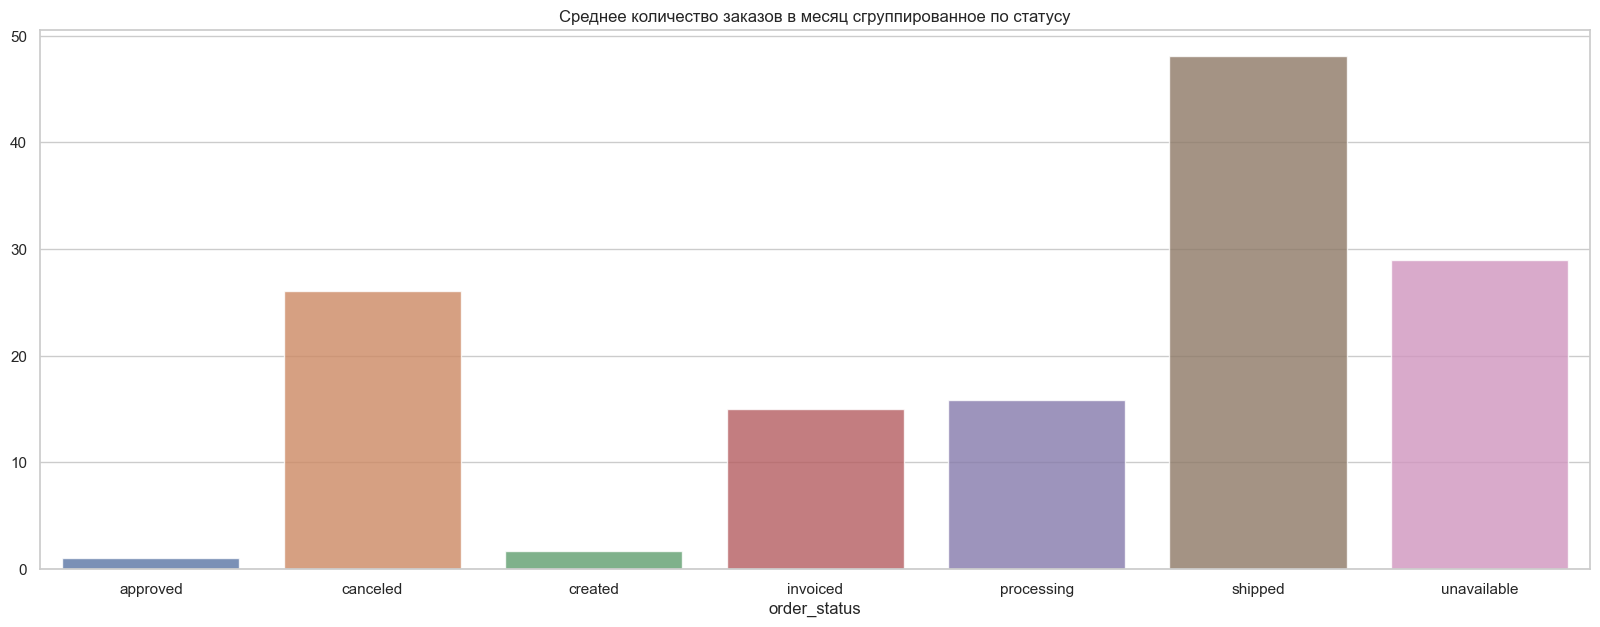

In [22]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
sns.barplot(x = means.index, y = means.values, alpha=0.8)\
.set(title='Среднее количество заказов в месяц сгруппированное по статусу');

#### Ответ
Из точно не доставленных, можно сказать, что в среднем в месяц 26 заказов отменяется и 29 заказов недоступны.\
В статусе "доставка" товары видимо теряются в среднем количестве 48. Остальное недоставляется по причинам ошибок при обработке заказа, таких ошибок в среднем 33 в месяц. 

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)


In [23]:
# Объединим таблицы с заказами и с товарами по id заказа. Оставим нужные поля.
olist_orders_and_items = olist_orders.merge(olist_order_items, how='left',on='order_id') \
    [['product_id','order_purchase_timestamp','order_status']]
olist_orders_and_items.head()

,product_id,order_purchase_timestamp,order_status
0,87285b34884572647811a353c7ac498a,2017-10-02 10:56:33,delivered
1,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37,delivered
2,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49,delivered
3,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06,delivered
4,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39,delivered


In [24]:
# Преведём время к дню недели. Заполним новое поле.
olist_orders_and_items['week_day'] = olist_orders_and_items.order_purchase_timestamp.dt.day_name() #olist_orders.order_purchase_timestamp.dt.day_name()
olist_orders_and_items.week_day.head()

0       Monday
1      Tuesday
2    Wednesday
3     Saturday
4      Tuesday
Name: week_day, dtype: object

In [25]:
# Посчитаем пропуски.
olist_orders_and_items.isna().sum()

product_id                  775
order_purchase_timestamp      0
order_status                  0
week_day                      0
dtype: int64

Пропущеные id товара мы не восстановим, поэтому придётся удалить данные.

In [26]:
# Удаляем пропуски.
olist_orders_and_items = olist_orders_and_items.dropna()

In [27]:
# Доставленные товары сгруппируем по дням недели.
id_purchase_day = olist_orders_and_items.query('order_status == "delivered"') \
    .groupby(['product_id','week_day'],as_index=False) \
    .agg({'order_status':'count'})
id_purchase_day.head()

,product_id,week_day,order_status
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [28]:
max_orders = id_purchase_day.groupby('product_id').max().sort_values('order_status', ascending=False)
max_orders.head(10)

,week_day,order_status
product_id,,
422879e10f46682990de24d770e7f83d,Wednesday,93
99a4788cb24856965c36a24e339b6058,Wednesday,91
aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,89
53b36df67ebb7c41585e8d54d6772e08,Wednesday,76
368c6c730842d78016ad823897a372db,Wednesday,67
389d119b48cf3043d311335e499d9c6b,Wednesday,67
53759a2ecddad2bb87a079a1f1519f73,Wednesday,66
d1c427060a0f73f6b889a5c7c61f2ac4,Wednesday,62
3dd2a17168ec895c781a9191c1e95ad7,Wednesday,53


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

In [29]:
# Приведём время покупки к месяцу.
olist_orders['month'] = olist_orders.order_purchase_timestamp.dt.month_name()

In [30]:
# Посчитаем количество семидневных периодов в каждом месяце.
olist_orders['weeks'] = olist_orders.order_purchase_timestamp.dt.days_in_month / 7
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,weeks
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,4.428571
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,4.428571
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,4.428571
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,4.285714
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,4.000000


In [31]:
# Группируем доставленные покупки по пользователям и неделям.  
customer_by_month = olist_orders.query('order_status == "delivered"') \
    .groupby(['customer_id','weeks'], as_index=False) \
    .agg({'order_status':'count'})
customer_by_month['avg_orders'] = customer_by_month.order_status / customer_by_month.weeks
customer_by_month.head()

,customer_id,weeks,order_status,avg_orders
0,00012a2ce6f8dcda20d059ce98491703,4.285714,1,0.233333
1,000161a058600d5901f007fab4c27140,4.428571,1,0.225806
2,0001fd6190edaaf884bcaf3d49edf079,4.000000,1,0.250000
3,0002414f95344307404f0ace7a26f1d5,4.428571,1,0.225806
4,000379cdec625522490c315e70c7a9fb,4.285714,1,0.233333


#### Проверяем все ли пользователи посчитаны.

In [32]:
olist_orders.query('order_status == "delivered"') \
    .customer_id.nunique() == customer_by_month.customer_id.nunique()

True

###  5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

In [33]:
# Объединим таблицы с заказами и пользователями по id пользователя. Оставим только доставленные.
orders_uniq_id = olist_orders.merge(olist_customers, how='inner', on='customer_id')
delivered_orders_uniq_id = orders_uniq_id[orders_uniq_id.order_status == 'delivered']

# Выберем покупки за 2017 год + 3 месяца 2018 года для оценки retantion.
delivered_orders_uniq_id = delivered_orders_uniq_id[delivered_orders_uniq_id.order_purchase_timestamp\
                                                    .between('2017-01-01', '2018-04-01')]
delivered_orders_uniq_id.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,weeks,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,4.428571,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,4.285714,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,4.000000,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,July,4.428571,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,May,4.428571,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ


In [34]:
# Добавим поле с месяцем покупки.
delivered_orders_uniq_id['purchase_month'] = delivered_orders_uniq_id.order_purchase_timestamp.dt.to_period('M')

In [35]:
# Выберем нужные поля и упорядочим по дате.
delivered_orders_uniq_id = delivered_orders_uniq_id[['customer_unique_id','order_id','purchase_month']]
delivered_orders_uniq_id = delivered_orders_uniq_id.sort_values('purchase_month')
delivered_orders_uniq_id.head()

,customer_unique_id,order_id,purchase_month
56858,06058fe38c88d8d03a06ebaa6fb68aad,54d744a4410b1edccc36c6d1f1c7e097,2017-01
7957,2fb246d1ccf7be8743d4a385db89cbb9,1e6025fd19451c74352d0bbf6a218bf6,2017-01
27259,1c61833a5bbe555d71990cf46c3ccd2b,10bce195e3966122a3dd0e2aa676f761,2017-01
12548,bd8717655febcdf30f106e9f3cb24628,b5b103fe531168050d785d5b8de74174,2017-01
73766,0383aca4e461346b22c75ea54eb548f2,3c4f38e27c5f6f27be39c8a2932c43e1,2017-01


In [36]:
# Добавим поле с месяцем первой покупки каждого пользователя.
first_date = delivered_orders_uniq_id.groupby('customer_unique_id',as_index=False) \
    .agg({'purchase_month':'first'}).rename(columns={'purchase_month':'first_order_month'})
delivered_orders_uniq_id = delivered_orders_uniq_id.merge(first_date, how='inner',on='customer_unique_id')
delivered_orders_uniq_id.head()

,customer_unique_id,order_id,purchase_month,first_order_month
0,06058fe38c88d8d03a06ebaa6fb68aad,54d744a4410b1edccc36c6d1f1c7e097,2017-01,2017-01
1,2fb246d1ccf7be8743d4a385db89cbb9,1e6025fd19451c74352d0bbf6a218bf6,2017-01,2017-01
2,1c61833a5bbe555d71990cf46c3ccd2b,10bce195e3966122a3dd0e2aa676f761,2017-01,2017-01
3,bd8717655febcdf30f106e9f3cb24628,b5b103fe531168050d785d5b8de74174,2017-01,2017-01
4,0383aca4e461346b22c75ea54eb548f2,3c4f38e27c5f6f27be39c8a2932c43e1,2017-01,2017-01


In [37]:
cohorts = delivered_orders_uniq_id.groupby(['first_order_month', 'purchase_month']) \
    .agg({'customer_unique_id':'count'}).copy()
cohorts.head()

customer_unique_id
first_order_month purchase_month                    
2017-01           2017-01                        750
                  2017-02                          2
                  2017-03                          2
                  2017-04                          1
                  2017-05                          3

In [38]:
# Проставим номер месяца для каждой когорты.
def cohort_month(df):
    df['month'] = np.arange(len(df)) + 1 
    return df

cohorts = cohorts.groupby('first_order_month').apply(cohort_month)

In [39]:
cohorts.head()

customer_unique_id  month
first_order_month purchase_month                           
2017-01           2017-01                        750      1
                  2017-02                          2      2
                  2017-03                          2      3
                  2017-04                          1      4
                  2017-05                          3      5

In [40]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['month','first_order_month'], inplace=True)
cohort_group_size = cohorts['customer_unique_id'].groupby(level=1).first()

In [41]:
retention = cohorts['customer_unique_id'].unstack('first_order_month').T.divide(cohort_group_size, axis=0)

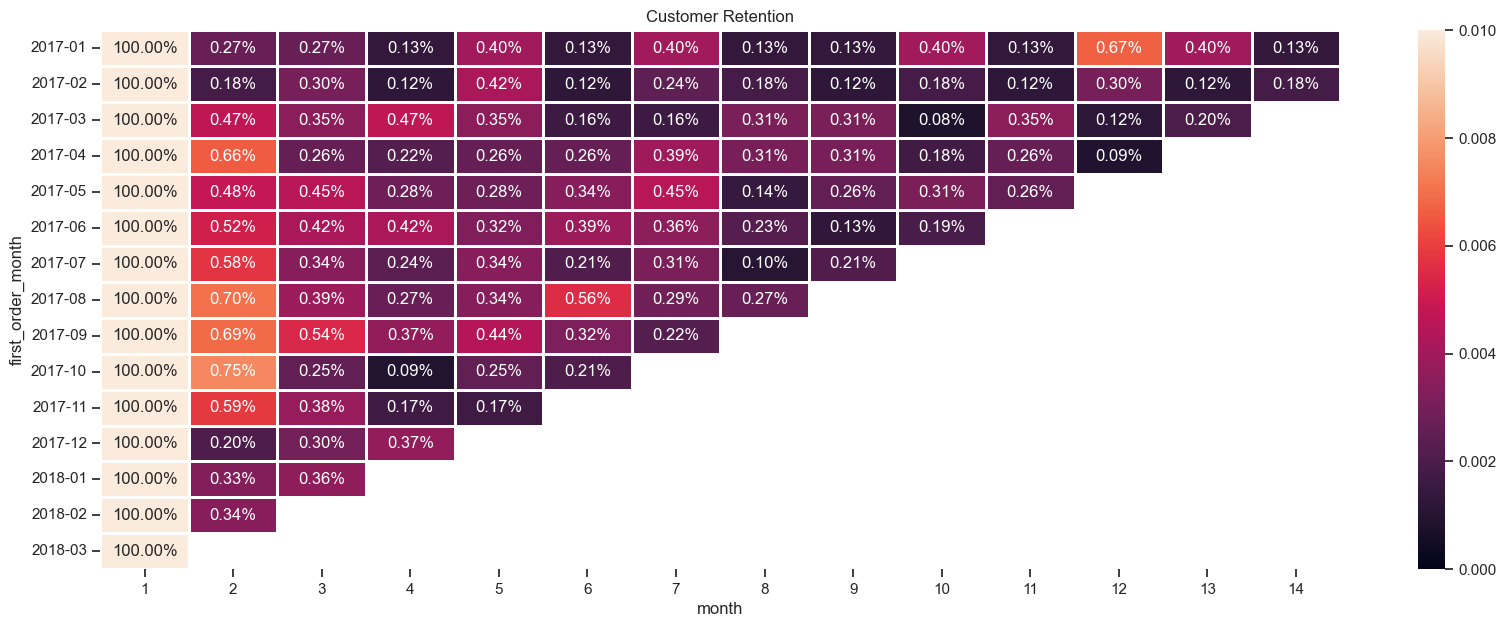

In [42]:
sns.set(style='ticks')
plt.title('Customer Retention')
sns.heatmap(retention, mask=retention.isnull(), annot=True, fmt='.2%', linewidths=1, vmin=0.0, vmax=0.01);

#### Ответ:
Самый высокий retention на 3й месяц показывает когорта 2017-03, 47%.

### 6. Используя python, построй RFM-сегментацию пользователей.
Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [43]:
# Объединим таблицы с заказами и пользователями по id пользователя и с товарами по id товара.
olist_orders_rfm = olist_orders.merge(olist_customers, on='customer_id', how='left')
orders_rfm = olist_orders_rfm.merge(olist_order_items, how='left', on='order_id')
orders_rfm.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,weeks,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October,4.428571,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July,4.428571,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August,4.428571,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November,4.285714,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February,4.000000,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [44]:
# Выберем только доставленные.
orders_rfm = orders_rfm[orders_rfm.order_status == 'delivered']

In [45]:
# Выберем поля с id, время покупки и цену.
orders_rfm = orders_rfm[['customer_unique_id','order_id','order_purchase_timestamp','price']]
orders_rfm.head()

,customer_unique_id,order_id,order_purchase_timestamp,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90


In [46]:
# Посчитаем частоту заказов. 
frequency = orders_rfm['customer_unique_id'].value_counts().rename_axis('customer_unique_id').to_frame('frequency')
frequency.head()

,frequency
customer_unique_id,
c8460e4251689ba205045f3ea17884a1,24
4546caea018ad8c692964e3382debd19,21
c402f431464c72e27330a67f7b94d4fb,20
698e1cf81d01a3d389d96145f7fa6df8,20
0f5ac8d5c31de21d2f25e24be15bbffb,18


In [47]:
# Изучим частоту для дальнейшего составления рейтинга
frequency.describe(percentiles = [.10, .20, .40, .50, .60, .70, .80, .90, .99])

,frequency
count,93358.000000
mean,1.180370
std,0.620857
min,1.000000
10%,1.000000
20%,1.000000
40%,1.000000
50%,1.000000
60%,1.000000
70%,1.000000


До квантиля 0.8 не более одной покупки. Посмотрим уникальные значения и поделим на ранги исходя их них.

In [48]:
frequency.frequency.value_counts()

1     81748
2      8797
3      1646
4       621
5       241
6       190
7        45
8        16
10       11
11       11
9        10
12        9
14        3
15        3
13        2
20        2
21        1
18        1
24        1
Name: frequency, dtype: int64

Будем делить по количеству:
1. -- 1 покупка
2. -- 2
3. -- 3 -6
4. \> 6

In [49]:
# Посчитаем monetary на каждого пользователя.
orders_monetary = orders_rfm.groupby(['customer_unique_id', 'price'], as_index=False)\
                                .agg({'price': 'sum'})\
                                .rename(columns={'price': 'monetary'})

In [50]:
# Найдем дату последней покупки по пользователям.
last_order = orders_rfm.sort_values('order_purchase_timestamp')\
                          .groupby('customer_unique_id', as_index=False).last().rename(columns={'order_purchase_timestamp': 'last_order'})
                          
last_order.last_order.head()

0   2018-05-10 10:56:27
1   2018-05-07 11:11:27
2   2017-03-10 21:05:03
3   2017-10-12 20:29:41
4   2017-11-14 19:45:42
Name: last_order, dtype: datetime64[ns]

In [51]:
# Соединим даты последних покупок с monetary по пользователям
orders_rm = last_order.merge(orders_monetary, on='customer_unique_id').sort_values('last_order', ascending=False)

In [52]:
# Смотрим распроеделения.
orders_rm.monetary.describe(percentiles = [.10, .20, .40, .50, .60, .70, .80, .90, .99])

count    98576.000000
mean       134.124920
std        206.338489
min          0.850000
10%         24.990000
20%         38.900000
40%         65.000000
50%         84.890000
60%        102.620000
70%        129.900000
80%        169.900000
90%        259.900000
99%        981.175000
max      13440.000000
Name: monetary, dtype: float64

Данные из прошлого, за текущую дату возьмём дату последней покупки + 1 день прозапас )).

In [53]:
# Последняя покупка + день.
last_purchase_date = orders_rm['last_order'].max() + pd.DateOffset(days=1)
last_purchase_date

Timestamp('2018-08-30 15:00:37')

In [54]:
# Посчитаем recency - сколько дней прошло с последней покупки у каждого пользователя.
orders_rm['recency'] = orders_rm['last_order'].apply(lambda x: (last_purchase_date - x).days)

In [55]:
# Смотрим распроеделения.
orders_rm.recency.describe(percentiles = [.10, .30, .20, .40, .50, .60, .70, .80, .90, .99])

count    98576.000000
mean       237.009942
std        152.322498
min          1.000000
10%         42.000000
20%         91.000000
30%        134.000000
40%        176.000000
50%        218.000000
60%        267.000000
70%        311.000000
80%        380.000000
90%        464.000000
99%        575.000000
max        714.000000
Name: recency, dtype: float64

In [56]:
# Снова соберём всё в одну таблицу.
orders_rfm = orders_rm.merge(frequency, on=['customer_unique_id'])

**Начнем сегментацию**

In [57]:
# Функция для recency и monetary.
def rank_quantiles(row, column, q_array):
    '''Returns the ranking of data points based on quantiles.'''
    if row <= q_array[0]:
        return 1
    elif row <= q_array[1]:
        return 2
    elif row <= q_array[2]:
        return 3
    else:
        return 4

# Расставим пороги.
quantiles_recency = orders_rfm['recency'].quantile([.25, .5, .75]).values
quantiles_monetary = orders_rfm['monetary'].quantile([.25, .5, .75]).values

# Расставим ранги.    
orders_rfm['rang_recency'] = orders_rfm['recency'].apply(lambda x: (5 - rank_quantiles(x, 'recency', quantiles_recency)))
orders_rfm['rang_monetary'] = orders_rfm['monetary'].apply(lambda x: rank_quantiles(x, 'monetary', quantiles_monetary))

In [58]:
# Функция для frequency.
def rank_frequency(row):
    if row == 1:
        return 1
    elif row == 2:
        return 2
    elif 6 >= row > 3:
        return 3
    else:
        return 4
    
# Расставим ранги.  
orders_rfm['rang_frequency'] = orders_rfm['frequency'].apply(lambda x: rank_frequency(x))

orders_rfm.head()

,customer_unique_id,order_id,last_order,price,monetary,recency,frequency,rang_recency,rang_monetary,rang_frequency
0,24ac2b4327e25baf39f2119e4228976a,35a972d7f8436f405b56e36add1a7140,2018-08-29 15:00:37,84.99,84.99,1,1,4,3,1
1,b701bebbdf478f5500348f03aff62121,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,24.90,24.90,1,1,4,1,1
2,7febafa06d9d8f232a900a2937f04338,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,45.90,45.90,1,1,4,2,1
3,5c58de6fb80e93396e2f35642666b693,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,209.00,418.00,1,2,4,4,2
4,7a22d14aa3c3599238509ddca4b93b01,52018484704db3661b98ce838612b507,2018-08-29 12:25:59,63.90,63.90,1,1,4,2,1


In [59]:
# Посмотрим на распределение рангов по признакам.
value_counts = orders_rfm.rang_recency.value_counts().to_frame()
value_counts['rang_frequency'] =  orders_rfm.rang_frequency.value_counts()
value_counts['rang_monetary'] = orders_rfm.rang_monetary.value_counts()
value_counts.sort_index()

,rang_recency,rang_frequency,rang_monetary
1,24560,81748,24833
2,24634,12125,24484
3,24494,1743,24783
4,24888,2960,24476


In [60]:
# Добавим поле с комбинацией рангов.

orders_rfm['rfm'] = orders_rfm['rang_recency'].map(str)\
                  + orders_rfm['rang_frequency'].map(str)\
                  + orders_rfm['rang_monetary'].map(str)
orders_rfm.head()

,customer_unique_id,order_id,last_order,price,monetary,recency,frequency,rang_recency,rang_monetary,rang_frequency,rfm
0,24ac2b4327e25baf39f2119e4228976a,35a972d7f8436f405b56e36add1a7140,2018-08-29 15:00:37,84.99,84.99,1,1,4,3,1,413
1,b701bebbdf478f5500348f03aff62121,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,24.90,24.90,1,1,4,1,1,411
2,7febafa06d9d8f232a900a2937f04338,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,45.90,45.90,1,1,4,2,1,412
3,5c58de6fb80e93396e2f35642666b693,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,209.00,418.00,1,2,4,4,2,424
4,7a22d14aa3c3599238509ddca4b93b01,52018484704db3661b98ce838612b507,2018-08-29 12:25:59,63.90,63.90,1,1,4,2,1,412


In [61]:
# Посмотрим сколько комбинаций - сегментов.
orders_rfm['rfm'].nunique()

64

In [62]:
orders_rfm['rfm'].unique()

array(['413', '411', '412', '424', '414', '434', '422', '421', '432',
       '431', '423', '443', '442', '441', '444', '433', '314', '311',
       '312', '313', '334', '321', '322', '324', '343', '344', '323',
       '333', '342', '341', '331', '332', '212', '213', '211', '243',
       '242', '214', '223', '222', '224', '221', '241', '233', '234',
       '244', '232', '231', '112', '114', '111', '113', '121', '123',
       '124', '143', '142', '122', '133', '134', '141', '144', '131',
       '132'], dtype=object)

In [63]:
# Выведем границы recency и monetary.
quantiles_recency[::-1], quantiles_monetary

(array([345., 218., 114.]), array([ 45.  ,  84.89, 149.  ]))

#### Ответ:
Начнём с конца и посмотрим на пользователей по их Тратам.
1. VIPы
    1. 444 - Большой чек, покупает часто, не забывает.
    2. 344 - Большой чек, частые заказы, но уже 114 дней не было заказа.
    3. 434 - Лояльный пользователь, от 3 до 6 заказов, покупка в течении 114 дней.
    4. 414, 424, 314 - Новый пользователь с большим чеком.
    5. 334, 234, 244 - Пользователи с большим чеком, несколькими покупками, но уже не активные (спящие)
2. Средние
    1. 412, 413, 411 - Новые пользователи, с одной недавней покупкой.
    2. 422, 423 - Новые пользователи, с двумя покупками, одна в течении 114 дней.
    3. 432, 433, 442, 443 - Новые пользователи, с 3-4 покупками, одна в течении 114 дней.
    4. 312, 313, 212, 213 - Пользователи с тратами около 85, с одной покупкой, но уже довольно давно (> 114 дней).
    5. 332, 333, 342, 343, 232, 233, 242, 243 - Здесь покупок 3 и выше, но уже довольно давно (> 114 дней).
    6. 322, 324, 323 - Пользователи с двумя покупками, но уже довольно давно (> 114 дней).
3. Ушедшие
    1. 111, 112, 113, 114 - Пользователи совершившие одну покупку давно.
    2. 121, 122, 123, 124 - Пользователи совершившие две покупки давно.
    3. 131, 132, 133, 134, 141, 142, 143, 144 - Ушедшие лояльные пользователи.
4. Спящие
    1. 311, 211 - Пользователи с одной покупкой до 45, но уже довольно давно (> 114 дней). 
    2. 321, 221 - Пользователи с двумя покупками до 45, но уже довольно давно (> 114 дней).
    3. 331, 341, 231, 241 - Пользователи с 3 и выше, покупками до 45, но уже довольно давно (> 114 дней).
    4. 214, 223, 222, 224 -Пользователи с одной- двумя покупками, но уже более 218 дней назад.
5. Экономные
    1. 421, 431, 441 Активные пользователи с несколькими покупками, но до 45.

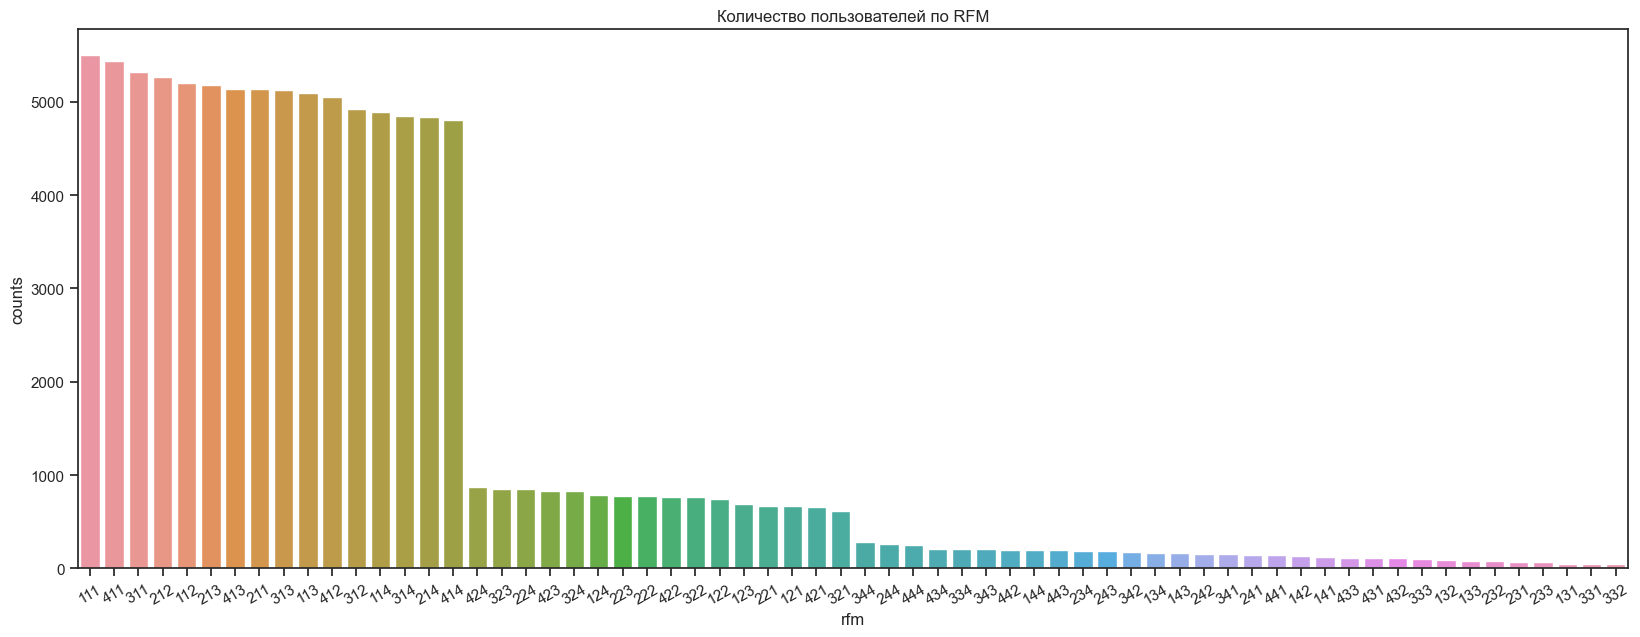

In [64]:
# Визуализация комбинаций.
plot_data = orders_rfm.rfm.value_counts().rename_axis('rfm').reset_index(name='counts')
s = sns.barplot(data=plot_data, x='rfm', y='counts')
s.set(title='Количество пользователей по RFM')
s.set_xticklabels(s.get_xticklabels(),rotation=30);

In [65]:
# Соберём списки для сегментов. (Извиняюся за хардкод).
vips = ['444', '344', '434', '414', '424', '314', '334', '234', '244']
settle = ['412', '413', '411', '422', '423', '432', '433', '442', '443',
          '312', '313', '212', '213', '332', '333', '342', '343', '232', '233', '242', '243', '322', '324', '323']
gone = ['111', '112', '113', '114', '121', '122', '123', '124', '131', '132', '133', '134', '141', '142', '143', '144']
sleep = ['311', '211', '321', '221', '331', '341', '231', '241', '214', '223', '222', '224']
poor = ['421', '431', '441']

In [66]:
def assign_seg(value):
    if value in vips:
        return 'vip'
    elif value in settle:
        return 'settle'
    elif value in gone:
        return 'gone'
    elif value in sleep:
        return 'sleep'
    else:
        return 'poor'

In [67]:
orders_rfm['seg'] = orders_rfm['rfm'].apply(assign_seg)
orders_rfm.head()

,customer_unique_id,order_id,last_order,price,monetary,recency,frequency,rang_recency,rang_monetary,rang_frequency,rfm,seg
0,24ac2b4327e25baf39f2119e4228976a,35a972d7f8436f405b56e36add1a7140,2018-08-29 15:00:37,84.99,84.99,1,1,4,3,1,413,settle
1,b701bebbdf478f5500348f03aff62121,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,24.90,24.90,1,1,4,1,1,411,settle
2,7febafa06d9d8f232a900a2937f04338,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,45.90,45.90,1,1,4,2,1,412,settle
3,5c58de6fb80e93396e2f35642666b693,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,209.00,418.00,1,2,4,4,2,424,vip
4,7a22d14aa3c3599238509ddca4b93b01,52018484704db3661b98ce838612b507,2018-08-29 12:25:59,63.90,63.90,1,1,4,2,1,412,settle


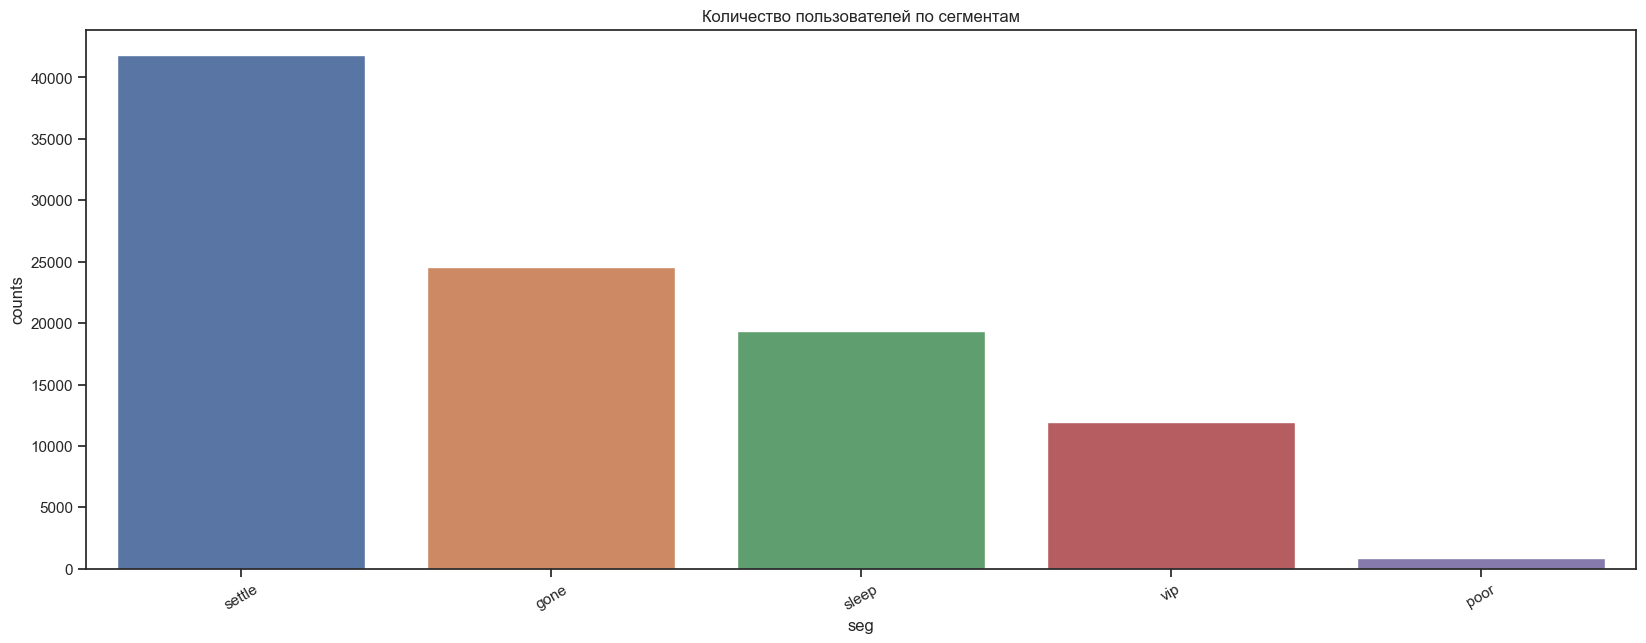

In [68]:
# Визуализация сегметов.
plot_data = orders_rfm.seg.value_counts().rename_axis('seg').reset_index(name='counts')
s = sns.barplot(data=plot_data, x='seg', y='counts')
s.set(title='Количество пользователей по сегментам')
s.set_xticklabels(s.get_xticklabels(),rotation=30);

Достаточно большре количество потеряных пользователей. Также много неактивных. Хоршо что лояльных почти половина.